<a href="https://colab.research.google.com/github/aihtn2708/Diagnostic-Analysis/blob/main/Diagnostic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here is the complete notebook to perform diagnostic analysis on a logistics dataset. This example uses a mock dataset to analyze delivery times and identify potential issues affecting the efficiency of the logistics operations.

This includes creating a sample logistics dataset, calculating summary statistics, visualizing the distribution of delivery times, comparing delivery times by vehicle type, analyzing the relationship between delivery time and distance, and assessing driver performance.

# Sample Logistics Data #

**Let's assume our dataset contains the following columns:**

* DeliveryID: Unique identifier for each delivery.

* DeliveryDate: Date of the delivery.

* DeliveryTime: Time taken for the delivery in hours.

* Distance: Distance covered for the delivery in kilometers.

* VehicleType: Type of vehicle used for the delivery (e.g., truck, van).

* DriverID: Unique identifier for each driver.

In [1]:
import pandas as pd
import numpy as np

# Creating a sample dataset
data = {
    'DeliveryID': range(1, 101),
    'DeliveryDate': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'DeliveryTime': np.random.normal(loc=5, scale=2, size=100),  # Normally distributed delivery times
    'Distance': np.random.normal(loc=50, scale=15, size=100),  # Normally distributed distances
    'VehicleType': np.random.choice(['Truck', 'Van'], size=100),
    'DriverID': np.random.choice(range(1, 11), size=100)
}

df = pd.DataFrame(data)

# Ensure no negative values
df['DeliveryTime'] = df['DeliveryTime'].apply(lambda x: abs(x))
df['Distance'] = df['Distance'].apply(lambda x: abs(x))

# Displaying the first few rows of the dataset
print(df.head())


   DeliveryID DeliveryDate  DeliveryTime   Distance VehicleType  DriverID
0           1   2023-01-01      1.877738  11.667046         Van         7
1           2   2023-01-02      5.882273  29.060112         Van         3
2           3   2023-01-03      0.624765  36.766707         Van         5
3           4   2023-01-04      3.613316  45.530669       Truck         3
4           5   2023-01-05      5.283107  39.271469       Truck         1


# Diagnostic Analysis #

The following analysis focuses on identifying patterns and anomalies in delivery times based on vehicle type, distance, and driver performance.

##Importing Libraries

In [6]:
#Importing Libraries

import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for seaborn
sns.set(style='whitegrid')


## Summary Statistics

In [7]:
# Summary statistics for the delivery times
summary_stats = df['DeliveryTime'].describe()
print(summary_stats)


count    100.000000
mean       4.972560
std        1.942173
min        0.179774
25%        3.712121
50%        5.199809
75%        6.234018
max        9.159878
Name: DeliveryTime, dtype: float64


## Distribution of Delivery Times

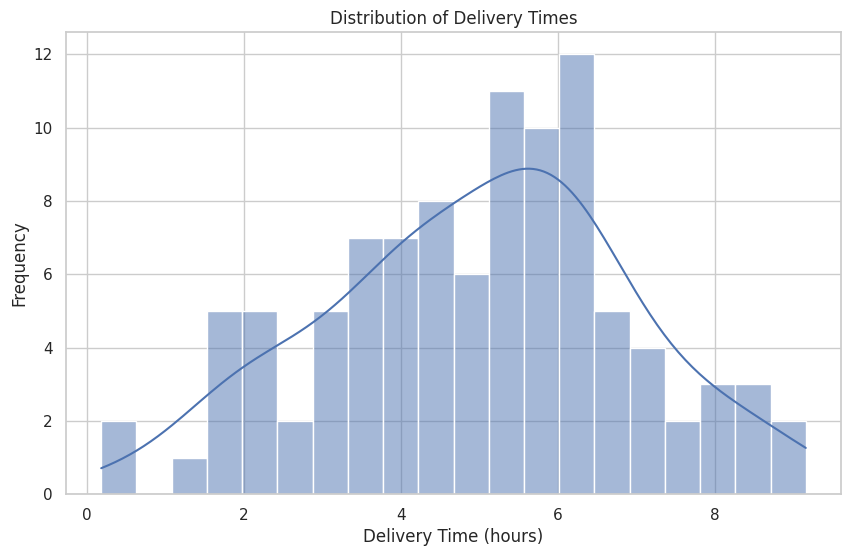

In [8]:
# Plotting the distribution of delivery times
plt.figure(figsize=(10, 6))
sns.histplot(df['DeliveryTime'], bins=20, kde=True)
plt.title('Distribution of Delivery Times')
plt.xlabel('Delivery Time (hours)')
plt.ylabel('Frequency')
plt.show()


## Delivery Time by Vehicle Type

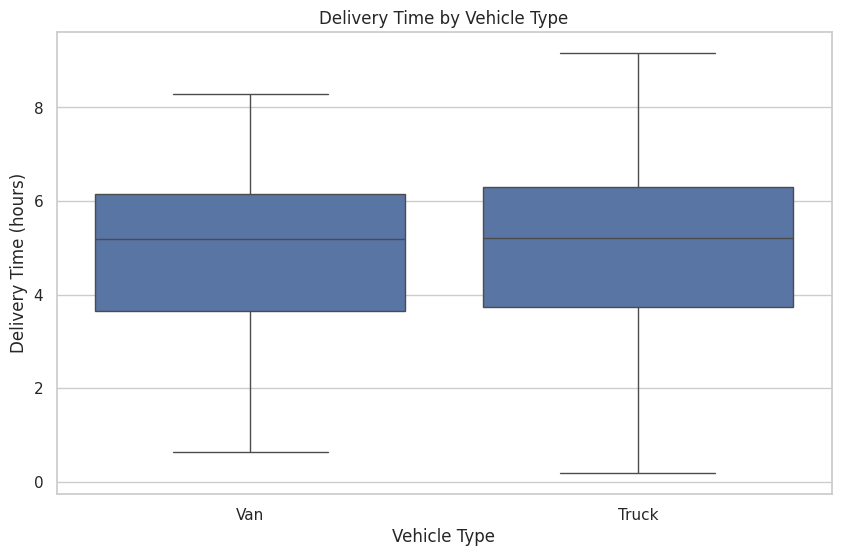

In [9]:
# Boxplot to compare delivery times by vehicle type
plt.figure(figsize=(10, 6))
sns.boxplot(x='VehicleType', y='DeliveryTime', data=df)
plt.title('Delivery Time by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Delivery Time (hours)')
plt.show()


## Delivery Time vs. Distance

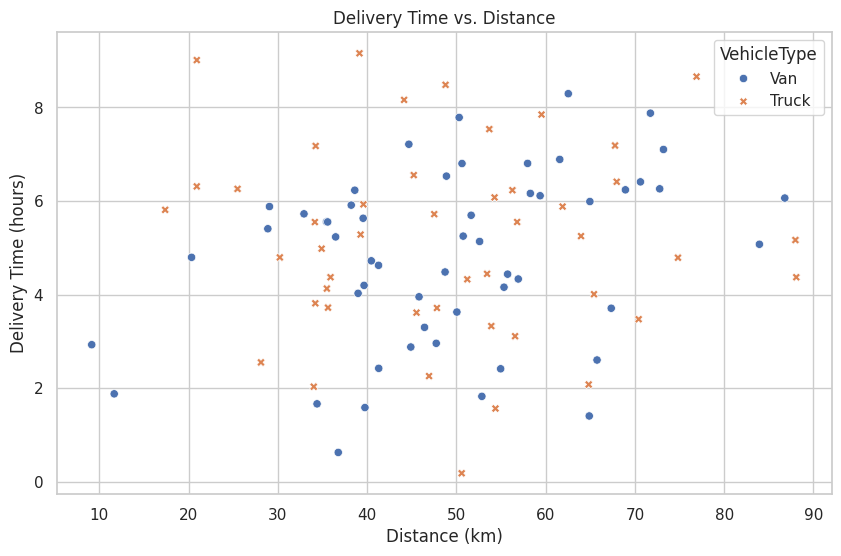

In [10]:
# Scatter plot of delivery time vs. distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance', y='DeliveryTime', hue='VehicleType', style='VehicleType', data=df)
plt.title('Delivery Time vs. Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Delivery Time (hours)')
plt.show()


## Driver Performance Analysis

<ipython-input-19-227c261219fa>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DriverID', y='DeliveryTime', data=df, palette="Blues")


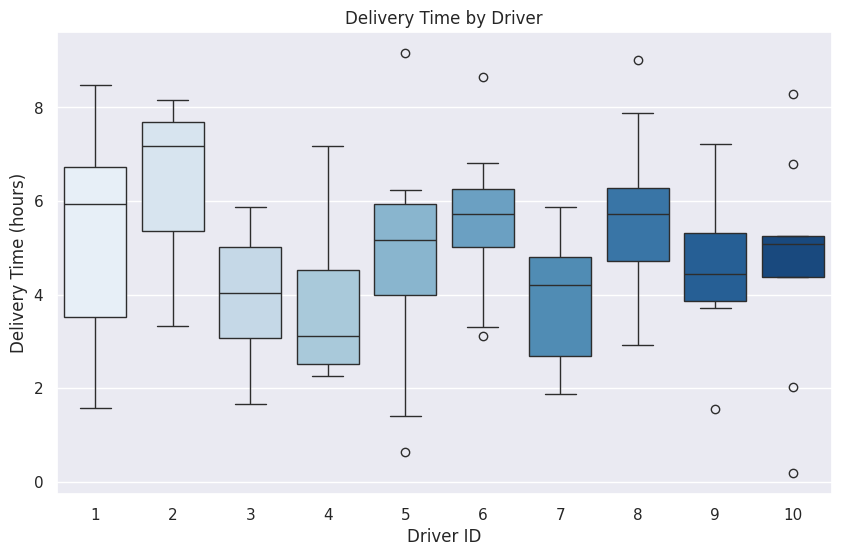

DriverID
2    6.395668
8    5.610664
6    5.549905
1    5.207334
5    4.747653
Name: DeliveryTime, dtype: float64


In [19]:
# Boxplot to compare delivery times by driver
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")
sns.boxplot(x='DriverID', y='DeliveryTime', data=df, palette="Blues")
plt.title('Delivery Time by Driver')
plt.xlabel('Driver ID')
plt.ylabel('Delivery Time (hours)')
plt.show()

# Identifying drivers with consistently high delivery times
high_time_drivers = df.groupby('DriverID')['DeliveryTime'].mean().sort_values(ascending=False)
print(high_time_drivers.head())


This code provides a basic framework for diagnosing potential issues in logistics operations based on delivery times.
By examining the distribution of delivery times, comparing times across vehicle types and drivers, and analyzing the relationship between delivery time and distance, you can identify patterns and outliers that may indicate inefficiencies or areas for improvement.